In [2]:
import math
class Ponto:
    def __init__(self,x,y):
        self.lat = x
        self.lon = y
        self.noise = False
        self.visited = False
        self.cluster = -1


def DBSCAN(D,eps,MinPts):
    c=0
    for p in D:
        if p.visited == False:
            p.visited = True
            NeighborPts = regionQuery(D,p,eps)
            if len(NeighborPts) < MinPts:
                p.noise = True
            else:
                c+=1
                expandCluster(D,p,NeighborPts,c,eps,MinPts)

def expandCluster(D,p,NeighborPts,c,eps,MinPts):
    p.cluster = c
    for q in NeighborPts:
        if q.visited == False:
            q.visited = True
            NeighborPts2 = regionQuery(D,q,eps)
            if len(NeighborPts2)>= MinPts:
                NeighborPts = NeighborPts+NeighborPts2
        if q.cluster == -1:
            q.cluster = c

def regionQuery(D,p,eps):
    neighbors = list()
    for q in D:
        if dist(p,q)<=eps:
            neighbors.append(q)
    return neighbors

def dist(p,q):
    return math.sqrt(math.pow(p.lat-q.lat,2)+math.pow(p.lon-q.lon,2))

from sklearn.datasets.samples_generator import make_blobs

# generating sampl data
centers = [[5, 5], [0, 0], [1, 5],[5, -1]]
X, labels_true =make_blobs(n_samples=500, n_features=5, centers=centers, cluster_std=0.9, center_box=(1, 10.0), shuffle=True, random_state=0)
D = list()
for i in X:
    D.append(Ponto(i[0],i[1]))


DBSCAN(D,0.5, 10)
t = 0
for j in D:
    print(j.cluster, end="  ")
    if j.cluster == 8:
        t+=1
print("\n")
print(t)

1  8  -1  -1  -1  2  -1  3  4  5  4  6  -1  7  36  -1  8  31  -1  -1  9  10  30  31  11  -1  35  -1  12  13  -1  11  12  13  -1  14  9  8  13  -1  6  13  4  9  15  31  -1  -1  -1  16  -1  34  -1  -1  9  31  17  18  -1  19  13  -1  8  8  -1  2  20  21  16  22  19  -1  16  14  -1  -1  21  23  -1  14  34  12  6  -1  2  1  19  2  17  -1  -1  14  -1  37  2  -1  17  24  -1  7  -1  23  -1  3  18  14  25  -1  8  15  5  24  26  23  -1  24  13  -1  27  2  8  -1  13  -1  -1  5  23  -1  -1  -1  -1  28  2  15  16  26  24  -1  15  1  7  14  -1  -1  17  14  -1  11  26  29  7  23  30  14  18  9  4  -1  -1  13  27  2  -1  26  4  3  17  39  7  5  1  -1  21  6  -1  8  23  -1  10  -1  15  -1  -1  20  10  7  16  -1  27  31  -1  22  13  15  26  13  3  -1  13  4  34  22  2  30  7  3  -1  10  -1  21  32  2  17  -1  29  27  13  5  26  -1  24  -1  9  7  2  11  -1  32  3  33  15  3  38  -1  29  34  14  31  -1  31  18  30  6  16  -1  -1  23  -1  36  3  34  -1  -1  9  -1  12  -1  -1  13  14  20  15  1  -1  -1  11 

Estimated number of clusters: 5
Homogeneity: 0.748
Completeness: 0.625
V-measure: 0.681
Adjusted Rand Index: 0.570
Adjusted Mutual Information: 0.622
Silhouette Coefficient: 0.303


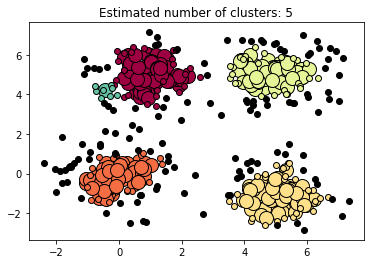

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# generating sampl data
centers = [[5, 5], [0, 0], [1, 5],[5, -1]]
X, labels_true =make_blobs(n_samples=500, n_features=5, centers=centers, cluster_std=0.9, center_box=(1, 10.0), shuffle=True, random_state=0)


# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)

#zeros_like :Return an array of zeros with the same shape and type as a given array., dtype will overrides the data type of the result.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

#core_sample_indices_ : Attributes and it is index of core samples (array, shape = [n_core_samples])
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

#print results 
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
      

# Drawing chart
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

